In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
dataset=r'C:\Users\KIIT\Videos\Face_Mask_Detection\dataset'
imagePaths=list(paths.list_images(dataset))

In [3]:
imagePaths

['C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0025.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0027.jpg',
 'C:\

In [4]:
#x is images and y are labels to differentiate between masked and unmasked indivisuals
data=[]
labels=[]
for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

C:\Users\KIIT\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [6]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [7]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [8]:
data.shape

(3833, 224, 224, 3)

In [9]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [10]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [11]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [13]:
train_X.shape

(3066, 224, 224, 3)

In [14]:
train_Y.shape

(3066, 2)

In [15]:
test_X.shape

(767, 224, 224, 3)

In [16]:
test_Y.shape

(767, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True)

In [18]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [19]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [20]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='Softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [22]:
learning_rate=0.001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v2.model')

C:\Users\KIIT\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
255/255 [==============================] - 659s 3s/step - loss: 0.2756 - accuracy: 0.9132 - val_loss: 7.6387 - val_accuracy: 0.5007
Epoch 2/20
255/255 [==============================] - 687s 3s/step - loss: 0.1936 - accuracy: 0.9499
Epoch 3/20
255/255 [==============================] - 559s 2s/step - loss: 0.1653 - accuracy: 0.9499
Epoch 4/20
255/255 [==============================] - 618s 2s/step - loss: 0.0887 - accuracy: 0.9718
Epoch 5/20
255/255 [==============================] - 578s 2s/step - loss: 0.0903 - accuracy: 0.9702
Epoch 6/20
255/255 [==============================] - 595s 2s/step - loss: 0.1543 - accuracy: 0.9551
Epoch 7/20
255/255 [==============================] - 636s 2s/step - loss: 0.1079 - accuracy: 0.9656
Epoch 8/20
255/255 [==============================] - 562s 2s/step - loss: 0.0723 - accuracy: 0.9781
Epoch 9/20
255/255 [==============================] - 413s 2s/step - loss: 0.0638 - accuracy: 0.9810
Epoch 10/20
255/255 [============================

INFO:tensorflow:Assets written to: C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v2.model\assets


INFO:tensorflow:Assets written to: C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v2.model\assets


In [23]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



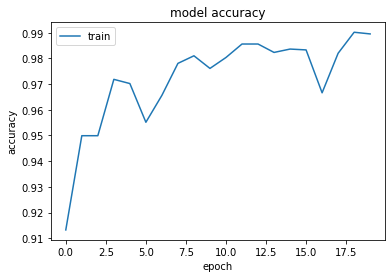

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

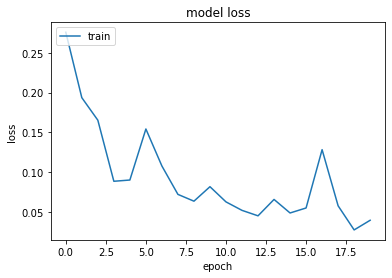

In [25]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()